In [1]:
# Import packages
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import socket 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
%load_ext dotenv
%dotenv ../.env

In [3]:
con = create_engine(os.getenv('BUILD_ENGINE').replace('localhost', os.getenv('IP')))

In [4]:
# Specify latest PLUTO version
pluto = 'pluto'
# Specify previous PLUTO version or the one you want to compare to
plutoprev = 'dcp_pluto'

In [5]:
cols = ['borough',
 'block',
 'lot',
 'cd',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healtharea',
 'sanitboro',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 'xcoord',
 'ycoord',
 'zonemap',
 'zmcode',
 'sanborn',
 'taxmap',
 'edesignum',
 'appbbl',
 'appdate',
 'plutomapid',
 'version',
 'sanitdistrict',
 'healthcenterdistrict',
 'firm07_flag',
 'pfirm15_flag',
 'rpaddate',
 'dcasdate',
 'zoningdate',
 'landmkdate',
 'basempdate',
 'masdate',
 'polidate',
 'edesigdate']

In [16]:
print(',\n'.join([f'sum(case when {i} is null then 1 else 0 end) as {i}' for i in cols]))

sum(case when borough is null then 1 else 0 end) as borough,
sum(case when block is null then 1 else 0 end) as block,
sum(case when lot is null then 1 else 0 end) as lot,
sum(case when cd is null then 1 else 0 end) as cd,
sum(case when ct2010 is null then 1 else 0 end) as ct2010,
sum(case when cb2010 is null then 1 else 0 end) as cb2010,
sum(case when schooldist is null then 1 else 0 end) as schooldist,
sum(case when council is null then 1 else 0 end) as council,
sum(case when zipcode is null then 1 else 0 end) as zipcode,
sum(case when firecomp is null then 1 else 0 end) as firecomp,
sum(case when policeprct is null then 1 else 0 end) as policeprct,
sum(case when healtharea is null then 1 else 0 end) as healtharea,
sum(case when sanitboro is null then 1 else 0 end) as sanitboro,
sum(case when sanitsub is null then 1 else 0 end) as sanitsub,
sum(case when address is null then 1 else 0 end) as address,
sum(case when zonedist1 is null then 1 else 0 end) as zonedist1,
sum(case when zonedi

In [17]:
sql = '''
SELECT  
   sum(case when borough is null then 1 else 0 end) as borough,
sum(case when block is null then 1 else 0 end) as block,
sum(case when lot is null then 1 else 0 end) as lot,
sum(case when cd is null then 1 else 0 end) as cd,
sum(case when ct2010 is null then 1 else 0 end) as ct2010,
sum(case when cb2010 is null then 1 else 0 end) as cb2010,
sum(case when schooldist is null then 1 else 0 end) as schooldist,
sum(case when council is null then 1 else 0 end) as council,
sum(case when zipcode is null then 1 else 0 end) as zipcode,
sum(case when firecomp is null then 1 else 0 end) as firecomp,
sum(case when policeprct is null then 1 else 0 end) as policeprct,
sum(case when healtharea is null then 1 else 0 end) as healtharea,
sum(case when sanitboro is null then 1 else 0 end) as sanitboro,
sum(case when sanitsub is null then 1 else 0 end) as sanitsub,
sum(case when address is null then 1 else 0 end) as address,
sum(case when zonedist1 is null then 1 else 0 end) as zonedist1,
sum(case when zonedist2 is null then 1 else 0 end) as zonedist2,
sum(case when zonedist3 is null then 1 else 0 end) as zonedist3,
sum(case when zonedist4 is null then 1 else 0 end) as zonedist4,
sum(case when overlay1 is null then 1 else 0 end) as overlay1,
sum(case when overlay2 is null then 1 else 0 end) as overlay2,
sum(case when spdist1 is null then 1 else 0 end) as spdist1,
sum(case when spdist2 is null then 1 else 0 end) as spdist2,
sum(case when spdist3 is null then 1 else 0 end) as spdist3,
sum(case when ltdheight is null then 1 else 0 end) as ltdheight,
sum(case when splitzone is null then 1 else 0 end) as splitzone,
sum(case when bldgclass is null then 1 else 0 end) as bldgclass,
sum(case when landuse is null then 1 else 0 end) as landuse,
sum(case when easements is null then 1 else 0 end) as easements,
sum(case when ownertype is null then 1 else 0 end) as ownertype,
sum(case when ownername is null then 1 else 0 end) as ownername,
sum(case when lotarea is null then 1 else 0 end) as lotarea,
sum(case when bldgarea is null then 1 else 0 end) as bldgarea,
sum(case when comarea is null then 1 else 0 end) as comarea,
sum(case when resarea is null then 1 else 0 end) as resarea,
sum(case when officearea is null then 1 else 0 end) as officearea,
sum(case when retailarea is null then 1 else 0 end) as retailarea,
sum(case when garagearea is null then 1 else 0 end) as garagearea,
sum(case when strgearea is null then 1 else 0 end) as strgearea,
sum(case when factryarea is null then 1 else 0 end) as factryarea,
sum(case when otherarea is null then 1 else 0 end) as otherarea,
sum(case when areasource is null then 1 else 0 end) as areasource,
sum(case when numbldgs is null then 1 else 0 end) as numbldgs,
sum(case when numfloors is null then 1 else 0 end) as numfloors,
sum(case when unitsres is null then 1 else 0 end) as unitsres,
sum(case when unitstotal is null then 1 else 0 end) as unitstotal,
sum(case when lotfront is null then 1 else 0 end) as lotfront,
sum(case when lotdepth is null then 1 else 0 end) as lotdepth,
sum(case when bldgfront is null then 1 else 0 end) as bldgfront,
sum(case when bldgdepth is null then 1 else 0 end) as bldgdepth,
sum(case when ext is null then 1 else 0 end) as ext,
sum(case when proxcode is null then 1 else 0 end) as proxcode,
sum(case when irrlotcode is null then 1 else 0 end) as irrlotcode,
sum(case when lottype is null then 1 else 0 end) as lottype,
sum(case when bsmtcode is null then 1 else 0 end) as bsmtcode,
sum(case when assessland is null then 1 else 0 end) as assessland,
sum(case when assesstot is null then 1 else 0 end) as assesstot,
sum(case when exempttot is null then 1 else 0 end) as exempttot,
sum(case when yearbuilt is null then 1 else 0 end) as yearbuilt,
sum(case when yearalter1 is null then 1 else 0 end) as yearalter1,
sum(case when yearalter2 is null then 1 else 0 end) as yearalter2,
sum(case when histdist is null then 1 else 0 end) as histdist,
sum(case when landmark is null then 1 else 0 end) as landmark,
sum(case when builtfar is null then 1 else 0 end) as builtfar,
sum(case when residfar is null then 1 else 0 end) as residfar,
sum(case when commfar is null then 1 else 0 end) as commfar,
sum(case when facilfar is null then 1 else 0 end) as facilfar,
sum(case when borocode is null then 1 else 0 end) as borocode,
sum(case when bbl is null then 1 else 0 end) as bbl,
sum(case when condono is null then 1 else 0 end) as condono,
sum(case when tract2010 is null then 1 else 0 end) as tract2010,
sum(case when xcoord is null then 1 else 0 end) as xcoord,
sum(case when ycoord is null then 1 else 0 end) as ycoord,
sum(case when zonemap is null then 1 else 0 end) as zonemap,
sum(case when zmcode is null then 1 else 0 end) as zmcode,
sum(case when sanborn is null then 1 else 0 end) as sanborn,
sum(case when taxmap is null then 1 else 0 end) as taxmap,
sum(case when edesignum is null then 1 else 0 end) as edesignum,
sum(case when appbbl is null then 1 else 0 end) as appbbl,
sum(case when appdate is null then 1 else 0 end) as appdate,
sum(case when plutomapid is null then 1 else 0 end) as plutomapid,
sum(case when version is null then 1 else 0 end) as version,
sum(case when sanitdistrict is null then 1 else 0 end) as sanitdistrict,
sum(case when healthcenterdistrict is null then 1 else 0 end) as healthcenterdistrict,
sum(case when firm07_flag is null then 1 else 0 end) as firm07_flag,
sum(case when pfirm15_flag is null then 1 else 0 end) as pfirm15_flag,
sum(case when rpaddate is null then 1 else 0 end) as rpaddate,
sum(case when dcasdate is null then 1 else 0 end) as dcasdate,
sum(case when zoningdate is null then 1 else 0 end) as zoningdate,
sum(case when landmkdate is null then 1 else 0 end) as landmkdate,
sum(case when basempdate is null then 1 else 0 end) as basempdate,
sum(case when masdate is null then 1 else 0 end) as masdate,
sum(case when polidate is null then 1 else 0 end) as polidate,
sum(case when edesigdate is null then 1 else 0 end) as edesigdate
FROM {}
'''

In [27]:
df = pd.read_sql(sql=sql.format(pluto), con=con)
df_prev = pd.read_sql(sql=sql.format(plutoprev), con=con)

In [28]:
df

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,0,0,2827,1098,2827,3544,2828,24992,3564,3551,3550,3744,3865,986,3345,839909,859505,859698,784946,859546,757211,859632,859711,856666,859711,986,3461,986,828725,1126,1104,993,49190,49190,49190,49190,49190,49190,49190,49190,986,1104,1104,986,986,1104,1104,1104,1104,57173,986,986,986,986,986,986,986,986,986,986,828790,858266,4906,986,986,986,0,0,851376,1098,2975,2975,3190,844094,2717,2717,859711,767723,767723,0,0,3744,3550,825061,794063,0,0,0,0,0,859711,859711,0


In [29]:
df_prev

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,0,0,1487,577,1487,2205,1488,20938,2225,2212,2211,2407,2527,473,2543,839637,859255,859446,784664,859293,757743,859381,859459,856423,2543,473,2924,473,828416,1573,1551,491,48821,48821,48821,48821,48821,48821,48821,48821,473,1551,1551,473,473,1551,1551,1551,1551,58669,473,473,473,473,473,473,473,473,473,473,828566,858019,4224,473,473,473,0,0,850985,577,1624,1624,2388,843835,1385,1385,850095,767716,767716,0,0,2407,2211,824764,793747,0,0,0,0,0,859459,859459,0


In [21]:
# df['version'] = '19v2_beta'
# df_prev['version'] = '19v1'

In [36]:
summary = pd.concat([df_prev,df], sort=False)
summary.index = ['19v1', '19v2_beta']
summary_pct = summary.iloc[:, :-1].pct_change()

In [37]:
summary_pct

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate
19v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19v2_beta,NaN,NaN,NaN,0.901143,0.902946,0.901143,0.607256,0.900538,0.193619,0.601798,0.605335,0.605608,0.555463,0.529482,1.084567,0.315376,0.000324,0.000291,0.000293,0.000359,0.000294,-0.000702,0.000292,0.000293,0.000284,337.069603,1.084567,0.183653,1.084567,0.000373,-0.28417,-0.288201,1.022403,0.007558,0.007558,0.007558,0.007558,0.007558,0.007558,0.007558,0.007558,1.084567,-0.288201,-0.288201,1.084567,1.084567,-0.288201,-0.288201,-0.288201,-0.288201,-0.025499,1.084567,1.084567,1.084567,1.084567,1.084567,1.084567,1.084567,1.084567,1.084567,1.084567,0.00027,0.000288,0.161458,1.084567,1.084567,1.084567,NaN,NaN,0.000459,0.902946,0.831897,0.831897,0.335846,0.000307,0.961733,0.961733,0.011312,0.000009,0.000009,NaN,NaN,0.555463,0.605608,0.00036,0.000398,NaN,NaN,NaN,NaN,NaN,0.000293,0.000293


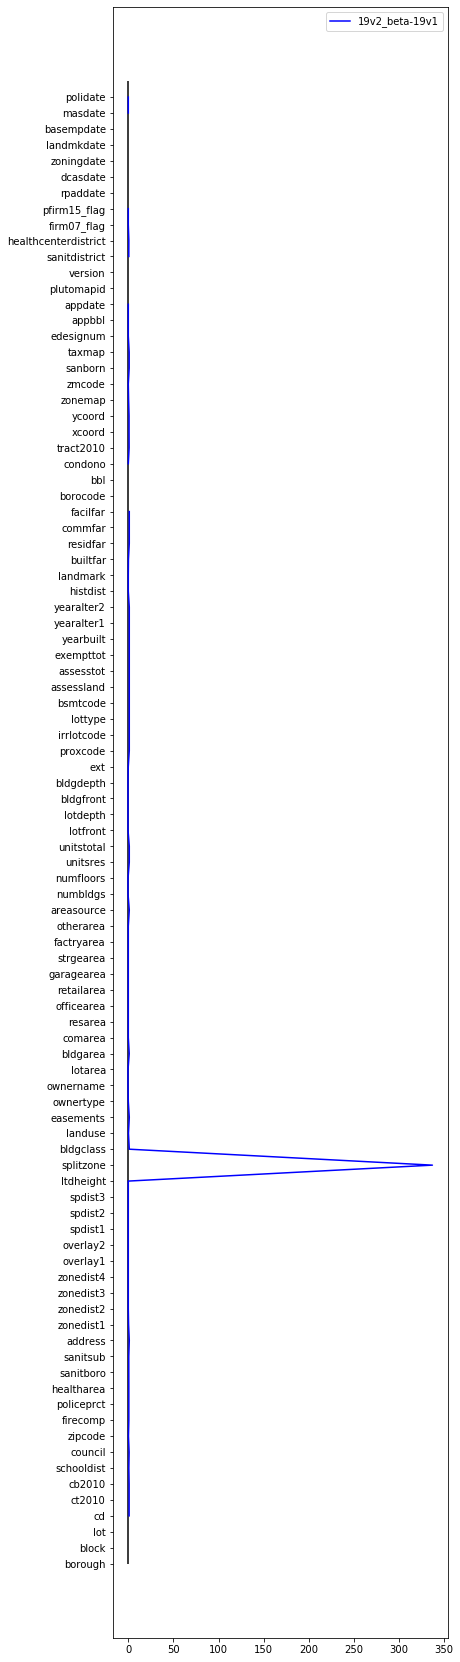

In [42]:
plt.figure(figsize=(6, 30))

difference1 = summary_pct.loc['19v2_beta',:]
num_col = len(summary_pct.columns)
plt.plot(difference1, range(num_col), label = '19v2_beta-19v1', color = 'blue')
plt.vlines(0, 0, num_col) #0 reference line

for i in range(num_col):
    if abs(difference1[i]) >= 10000:
        plt.text(x = difference1[i] , y = i - 0.15, s = '{}'.format(difference1[i]), size = 10, color = 'blue')
    else: 
        pass
    
plt.yticks(range(num_col), summary_pct.columns, rotation='horizontal')
# plt.title('19v1-18v2.1 Null 0 Counts Comparison')
plt.legend()
plt.show()